# Predicting Smoking Status Using Biosignal Data and SVM
ISTA 431 Final Project\
Author: Miguel Candido Aurora Peralta

## Data Source
[https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals](https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction-using-biosignals)

The data from Kaggle consists of two csv files, `test_dataset.csv` and `train_dataset.csv`. The training dataset contains the column `smoking` which indicates the smoking status of the individuals, while the test set does not, so I will only be using `train_dataset.csv` file for the purpose of this project.

In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv("train_dataset.csv")

In [14]:
display(df.columns)

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [25]:
print(f"Rows: {len(df.index)}")

Rows: 38984


In [23]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


## Features

|Feature|Description|
|---|---|
|age|In 5 year increments|
|height(cm)|In 5cm increments|
|weight(kg)|In 5kg increments|
|waist(cm)|Waist circumference|
|eyesight(left) and eyesight(right)|From 0.1 to 2.0 (higher indicates better vision), but blindness is indicated by 9.9|
|hearing(left) and hearing(right)|1 is normal and 2 is abnormal|
|systolic|Blood pressure measurement when heart is contracting|
|relaxation|Blood pressure measurement when heart is relaxed, aka diastolic blood pressure|
|fasting blood sugar|Amount of glucose in blood when fasting (when it should be lowest)|
|Cholesterol|This figure is calculated as HDL+LDL+(0.2*triglyceride)|
|triglyceride|Amount of lipid in the blood.|
|HDL|High-density lipoprotein cholesterol level.|
|LDL|Low-density lipoprotein cholesterol level.|
|hemoglobin|Hemoglobin level in blood.|
|Urine protein|Level of protein in urine.|
|serum creatinine|Serum creatinine level.|
|AST|Level of aspartate aminotransferase enzyme.|
|ALT|evel of alanine aminotransferase enzyme.|
|Gtp|Level of gamma-glutamyl transpeptidase enzyme.|
|dental caries|Presence of dental cavities. 0 means they are absent, 1 means they are present|


## Preprocessing

The 9.9 values for eyesight can be converted to zeroes to fit with the format of 0.1 to 2.0, with higher values indicating better vision. <br><br>
The cholesterol column can be dropped as it is calculated from the existing HDL, LDL, and triglyceride values. 

In [29]:
df['eyesight(left)'].replace({9.9:0}, inplace=True)
df['eyesight(right)'].replace({9.9:0}, inplace=True)

df.drop(['Cholesterol'], axis=1, inplace=True)


## Correlation Matrix

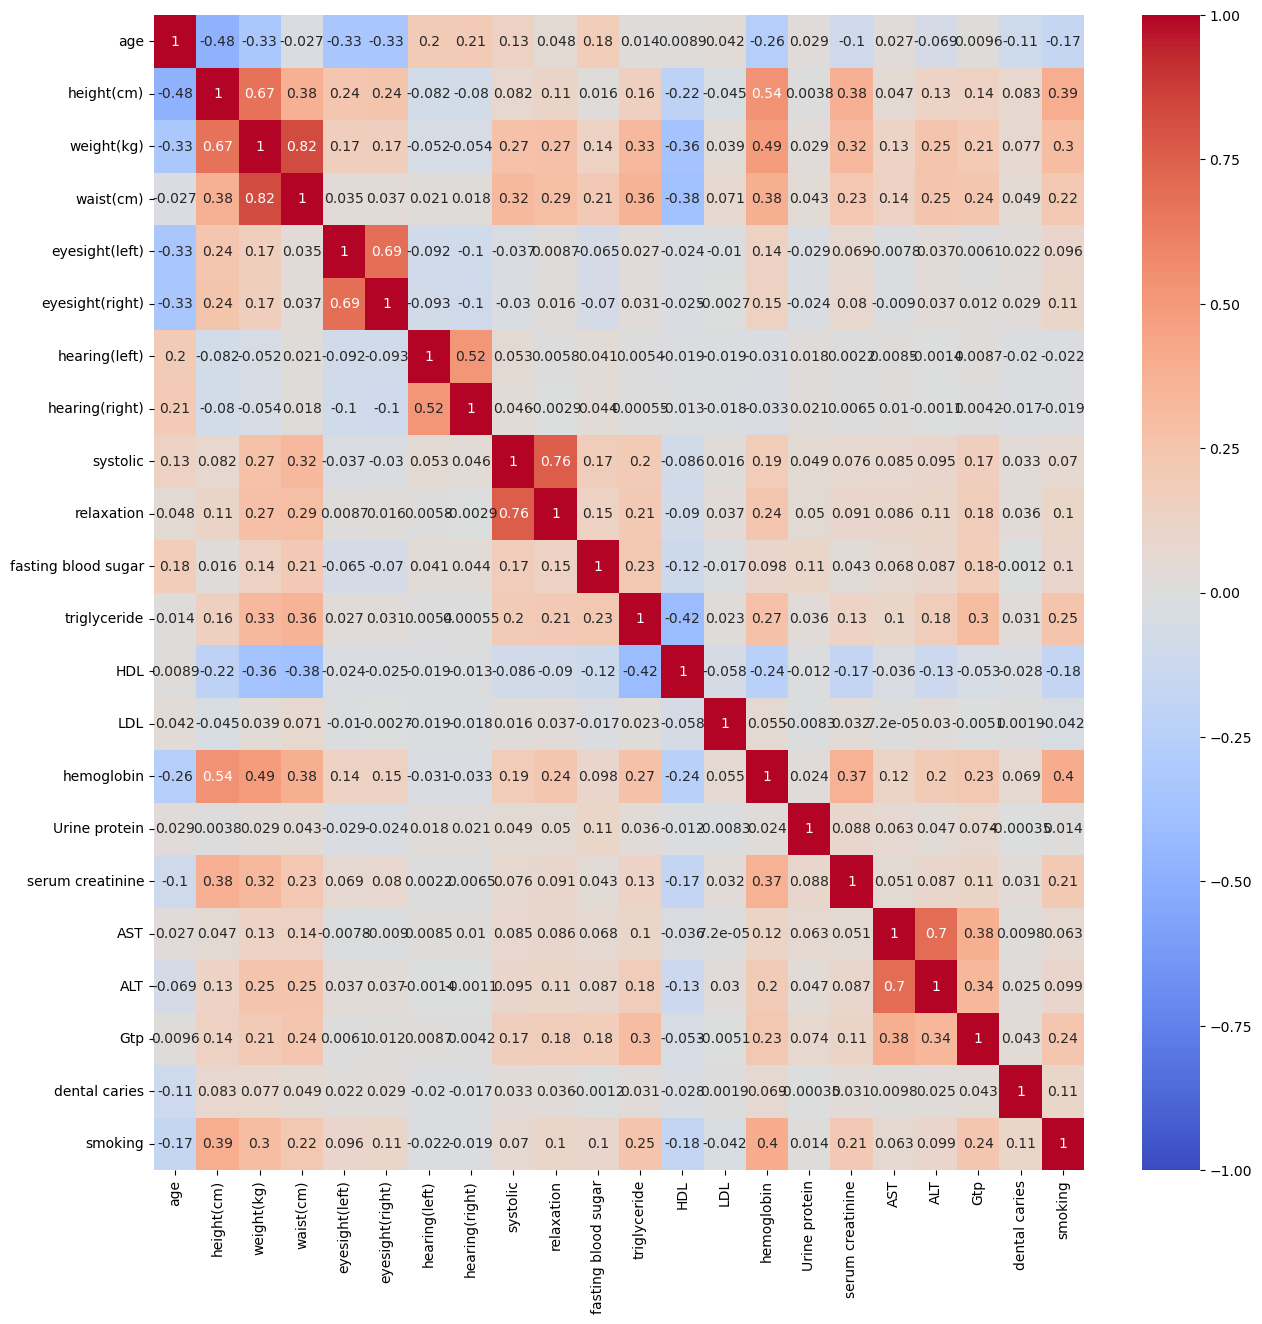

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
ax, fig = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmin=-1, cmap="coolwarm", annot=True)
plt.show()

## Train, Validation, and Test Splits

In [34]:
from sklearn import model_selection, preprocessing

X = df.drop(["smoking"], axis=1)
y = df["smoking"]

# Standardizing features
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

## Selecting optimal hyper-parameters
Grid search is an approach to hyper-parameter tuning that will build and evaluate models for each combination of specified algorithm parameters. Scikit-learn has GridsearchCV to perform this task. 

In [35]:
from sklearn import svm

kernels = list(['linear', 'rbf', 'poly', 'sigmoid'])
c = list([1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3)
gammas = list([0.1, 1, 10, 100])

clf = svm.SVC()
clf.fit(X_train, y_train)
param_grid = dict(kernel=kernels, C=c, gamma=gammas)
grid = model_selection.GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
best_params = grid.best_params_
best_params

## Testing the model on the test set

## Evaluation of performance

## Conclusion